In [1]:
import sys
sys.path.append('../preprocess_assets/')

In [2]:
import gensim
from sklearn.decomposition import PCA
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import arabic_reshaper
import pandas as pd
from word2vec_results import *

In [3]:
rezk_model = gensim.models.Word2Vec.load("Twittert-CBOW/fullgram/CBOW_space_300/min_count_100/window_3/continuous_bow_fullgram_vec_size_300-d_min_count_100")

bakr_model = gensim.models.Word2Vec.load("full_grams_cbow_300_twitter.mdl")

muhammed_model= gensim.models.Word2Vec.load("w2v_CBOW_300_3_400_10.model")


In [4]:
vocabs = list(rezk_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))

The number of words the model learn from your dataset are: 2027042


In [5]:
vocabs = list(bakr_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))

The number of words the model learn from your dataset are: 1476715


In [6]:
vocabs = list(muhammed_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))

The number of words the model learn from your dataset are: 49555


In [7]:
tokens_to_graphs = {
    'O_+_token': [],
    'O_+_%': [],
    'ü§£_token': [],
    'ü§£_%': [],
    'üá∞üáº_token': [],
    'üá∞üáº_%': [],
    'üè°_token': [],
    'üè°_%': [],
    'IT_token': [],
    'IT_%': [],
    'ÿü_token': [],
    'ÿü_%': [],
    'ŸÉŸàŸÅŸäÿØ_token': [],
    'ŸÉŸàŸÅŸäÿØ_%': [],
    'ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä_token': [],
    'ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä_%': [],
    'ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ_token': [],
    'ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ_%': [],
    'ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá_token': [],
    'ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá_%': [],
    'ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ_token': [],
    'ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ_%': [],
        'ŸÉÿßŸäÿ±Ÿà_token': [],
    'ŸÉÿßŸäÿ±Ÿà_%': [],
            'ŸäŸÜÿ™ÿµÿ±_token': [],
    'ŸäŸÜÿ™ÿµÿ±_%': [],
            'ÿÆÿ±Ÿäÿ¨_token': [],
    'ÿÆÿ±Ÿäÿ¨_%': [],
        'ŸàŸäÿ¨ÿ≤_token': [],
    'ŸàŸäÿ¨ÿ≤_%': [],
        'üå∏_token': [],
    'üå∏_%': [],
            'üîë_token': [],
    'üîë_%': [],
        'ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_token': [],
    'ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_%': [],
    'ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá_token': [],
    'ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá_%': [],
}

In [8]:
bakr_tokens_to_graphs = {
    'üè°_token': [],
    'üè°_%': [],
    'ÿü_token': [],
    'ÿü_%': [],
    'ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_token': [],
    'ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_%': [],
    'ŸÉÿßŸäÿ±Ÿà_token': [],
    'ŸÉÿßŸäÿ±Ÿà_%': [],
        'üîë_token': [],
    'üîë_%': [],
    'üå∏_token': [],
    'üå∏_%': [],

        'ŸäŸÜÿ™ÿµÿ±_token': [],
    'ŸäŸÜÿ™ÿµÿ±_%': [],
            'ÿÆÿ±Ÿäÿ¨_token': [],
    'ÿÆÿ±Ÿäÿ¨_%': [],
        'ŸàŸäÿ¨ÿ≤_token': [],
    'ŸàŸäÿ¨ÿ≤_%': [],
}

In [9]:
muhammed_tokens_to_graphs = {
        'ŸäŸÜÿ™ÿµÿ±_token': [],
    'ŸäŸÜÿ™ÿµÿ±_%': [],
            'ÿÆÿ±Ÿäÿ¨_token': [],
    'ÿÆÿ±Ÿäÿ¨_%': [],
}

In [10]:
similar_tokens = rezk_model.wv.most_similar('ŸäŸÜÿ™ÿµÿ±')
for similar in similar_tokens:
    tokens_to_graphs['ŸäŸÜÿ™ÿµÿ±_token'].append(similar[0])
    tokens_to_graphs['ŸäŸÜÿ™ÿµÿ±_%'].append(similar[1])

In [11]:
similar_tokens

[('ÿßŸÜÿ™ÿµÿ±', 0.651455283164978),
 ('ŸäŸÇÿßÿ™ŸÑ', 0.6465153098106384),
 ('Ÿäÿ≠ÿßÿ±ÿ®', 0.5891581773757935),
 ('ŸäŸàÿßÿ¨Ÿá', 0.5724115967750549),
 ('ÿ≥ŸäŸÜÿ™ÿµÿ±', 0.5710309147834778),
 ('Ÿäÿ≥ÿ™ÿ≥ŸÑŸÖ', 0.5659409761428833),
 ('ŸäŸÜŸáÿ≤ŸÖ', 0.5622171759605408),
 ('ŸäÿÆÿ≥ÿ±', 0.559613823890686),
 ('ŸäŸáÿ≤ŸÖ', 0.5417757034301758),
 ('Ÿäÿ≥ŸÇÿ∑', 0.5411337018013)]

In [12]:
similar_tokens = bakr_model.wv.most_similar('ŸäŸÜÿ™ÿµÿ±')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ŸäŸÜÿ™ÿµÿ±_token'].append(similar[0])
    bakr_tokens_to_graphs['ŸäŸÜÿ™ÿµÿ±_%'].append(similar[1])

In [13]:
similar_tokens

[('ÿßŸÜÿ™ÿµÿ±', 0.6460888385772705),
 ('ÿ™ŸÜÿ™ÿµÿ±', 0.6231251358985901),
 ('ÿ≥ŸäŸÜÿ™ÿµÿ±', 0.6034882664680481),
 ('Ÿäÿ≥ÿ™ÿ≥ŸÑŸÖ', 0.6003603339195251),
 ('ŸäŸáÿ≤ŸÖ', 0.596508800983429),
 ('ŸÜŸÜÿ™ÿµÿ±', 0.5851215720176697),
 ('Ÿäÿ™ÿ∫ŸÑÿ®', 0.5742601752281189),
 ('ŸäŸÜÿ≠ÿßÿ≤', 0.5628108382225037),
 ('Ÿäÿ±ÿ∂ÿÆ', 0.5458214282989502),
 ('ŸäŸÇŸàŸÑ_ŸÉŸÑŸÖÿ™Ÿá', 0.542996346950531)]

In [14]:
similar_tokens = muhammed_model.wv.most_similar('ŸäŸÜÿ™ÿµÿ±')
for similar in similar_tokens:
    muhammed_tokens_to_graphs['ŸäŸÜÿ™ÿµÿ±_token'].append(similar[0])
    muhammed_tokens_to_graphs['ŸäŸÜÿ™ÿµÿ±_%'].append(similar[1])

In [15]:
similar_tokens

[('ŸäŸÜÿ™ÿµ', 0.6200209856033325),
 ('ŸäŸÜÿ™', 0.556247353553772),
 ('Ÿäÿ≠ÿßÿ±ÿ®', 0.4712071418762207),
 ('ŸäŸÜ', 0.34299731254577637),
 ('ÿßŸÜÿ™ÿµÿ±', 0.3315746486186981),
 ('ÿ™ŸÜÿ™ÿµÿ±', 0.33046194911003113),
 ('ŸäÿπŸàÿØ', 0.3167138993740082),
 ('ÿßŸÜÿ™ÿµÿ±ÿ™', 0.3106973469257355),
 ('ÿ™ÿ°ÿ™Ÿä', 0.30553698539733887),
 ('ÿ≥ŸÑŸÖÿßŸÜ', 0.3003996014595032)]

In [16]:
similar_tokens = rezk_model.wv.most_similar('ÿÆÿ±Ÿäÿ¨')
for similar in similar_tokens:
    tokens_to_graphs['ÿÆÿ±Ÿäÿ¨_token'].append(similar[0])
    tokens_to_graphs['ÿÆÿ±Ÿäÿ¨_%'].append(similar[1])

In [17]:
similar_tokens

[('ÿ™ÿÆÿµÿµ', 0.7142242789268494),
 ('ŸáŸÜÿØÿ≥Ÿá', 0.7090756893157959),
 ('ÿØÿ®ŸÑŸàŸÖ', 0.6927738785743713),
 ('ŸÖÿ™ÿÆÿ±ÿ¨', 0.6869535446166992),
 ('ŸÉŸÑŸäŸá', 0.6784682273864746),
 ('ÿ¨ÿßŸÖÿπŸá', 0.6749193668365479),
 ('ÿØÿßÿ±ÿ≥', 0.6581009030342102),
 ('ÿÆÿ±Ÿäÿ¨Ÿá', 0.6541006565093994),
 ('ŸÖÿØÿ±ÿ≥', 0.6437668204307556),
 ('ÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥', 0.6400926113128662)]

In [18]:
similar_tokens = bakr_model.wv.most_similar('ÿÆÿ±Ÿäÿ¨')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ÿÆÿ±Ÿäÿ¨_token'].append(similar[0])
    bakr_tokens_to_graphs['ÿÆÿ±Ÿäÿ¨_%'].append(similar[1])

In [19]:
similar_tokens

[('ŸÖÿ™ÿÆÿ±ÿ¨', 0.7290518879890442),
 ('ÿÆÿ±Ÿäÿ¨_ŸÉŸÑŸäŸá', 0.6631026864051819),
 ('ŸàÿÆÿ±Ÿäÿ¨', 0.6372433304786682),
 ('ÿ®ŸÉŸÑŸàÿ±ŸäŸàÿ≥', 0.6184447407722473),
 ('ŸÖŸáŸÜÿØÿ≥', 0.6107056736946106),
 ('ŸÉÿ∑ÿßŸÑÿ®', 0.599929690361023),
 ('ÿ∑ÿßŸÑÿ®', 0.5964147448539734),
 ('ŸàŸÖÿ™ÿÆÿ±ÿ¨', 0.5926499366760254),
 ('ÿ®ŸÉÿßŸÑÿ±ŸäŸàÿ≥', 0.5886915326118469),
 ('ÿÆÿ±Ÿäÿ¨ŸäŸÜ', 0.588064968585968)]

In [20]:
similar_tokens = muhammed_model.wv.most_similar('ÿÆÿ±Ÿäÿ¨')
for similar in similar_tokens:
    muhammed_tokens_to_graphs['ÿÆÿ±Ÿäÿ¨_token'].append(similar[0])
    muhammed_tokens_to_graphs['ÿÆÿ±Ÿäÿ¨_%'].append(similar[1])

In [21]:
similar_tokens

[('ŸÖÿ™ÿÆÿ±ÿ¨', 0.7610599398612976),
 ('ÿÆÿ±Ÿäÿ¨Ÿá', 0.5955337285995483),
 ('ÿ®ŸÉÿßŸÑÿ±ŸäŸàÿ≥', 0.5821039080619812),
 ('ÿÆÿ±Ÿäÿ¨Ÿä', 0.5499259233474731),
 ('ÿÆÿ±Ÿäÿ¨ŸäŸÜ', 0.5483648777008057),
 ('ŸÖÿ™ÿÆÿ±ÿ¨Ÿá', 0.5453131198883057),
 ('ÿØÿßÿ±ÿ≥', 0.5396440625190735),
 ('ÿ∑ÿßŸÑÿ®', 0.5366575717926025),
 ('ÿ®ŸÉÿßŸÑŸàÿ±Ÿäÿ≥', 0.5298030376434326),
 ('ÿ®ŸÉÿßŸÑŸàÿ±ŸäŸàÿ≥', 0.5252522230148315)]

In [22]:
similar_tokens = rezk_model.wv.most_similar('üå∏')
for similar in similar_tokens:
    tokens_to_graphs['üå∏_token'].append(similar[0])
    tokens_to_graphs['üå∏_%'].append(similar[1])

In [23]:
similar_tokens

[('üåº', 0.7827603816986084),
 ('üå∫', 0.7816051244735718),
 ('üå∑', 0.7739440202713013),
 ('üïä', 0.7702279686927795),
 ('üåπ', 0.7598779201507568),
 ('üçÉ', 0.7443662285804749),
 ('üåø', 0.7275475859642029),
 ('‚öò', 0.6947581768035889),
 ('üåª', 0.6937013268470764),
 ('üíê', 0.6767349243164062)]

In [24]:
similar_tokens = bakr_model.wv.most_similar('üå∏')
for similar in similar_tokens:
    bakr_tokens_to_graphs['üå∏_token'].append(similar[0])
    bakr_tokens_to_graphs['üå∏_%'].append(similar[1])

In [25]:
similar_tokens

[('üçÉ', 0.8405100107192993),
 ('üíï', 0.8223419785499573),
 ('üíú', 0.8145712614059448),
 ('‚ú®', 0.8067425489425659),
 ('üíó', 0.7939425706863403),
 ('üåø', 0.7814812064170837),
 ('üíì', 0.7685064077377319),
 ('üçÇ', 0.7592586874961853),
 ('üå∏üçÉ', 0.755847156047821),
 ('üíû', 0.7555315494537354)]

In [26]:
similar_tokens = rezk_model.wv.most_similar('üîë')
for similar in similar_tokens:
    tokens_to_graphs['üîë_token'].append(similar[0])
    tokens_to_graphs['üîë_%'].append(similar[1])

In [27]:
similar_tokens

[('ŸÖŸÅÿ™ÿßÿ≠', 0.4421654939651489),
 ('üóù', 0.38557443022727966),
 ('üéØ', 0.3628891706466675),
 ('üÖ∞Ô∏è', 0.34200042486190796),
 ('#_ŸÉŸÑÿ®Ÿá_ŸÖÿ∑ŸäÿπŸá', 0.3347412347793579),
 ('ÿßŸÑŸÖŸÅÿ™ÿßÿ≠', 0.3305990993976593),
 ('‚ôæ', 0.32080593705177307),
 ('‚óâ', 0.3206290006637573),
 ('‚úÖ', 0.3132442533969879),
 ('ŸÖŸÅÿßÿ™Ÿäÿ≠', 0.31249940395355225)]

In [28]:
similar_tokens = bakr_model.wv.most_similar('üîë')
for similar in similar_tokens:
    bakr_tokens_to_graphs['üîë_token'].append(similar[0])
    bakr_tokens_to_graphs['üîë_%'].append(similar[1])

In [29]:
similar_tokens

[('ÿßŸÑŸÅÿ¨ÿ±üîî', 0.5465772151947021),
 ('‚õÖ', 0.49957922101020813),
 ('üíûüíé‚ûçŸÅŸàŸÑŸàŸÖŸä', 0.4874758720397949),
 ('ŸÅŸàŸÑŸàÿ®ÿßŸÉüíûüíûüíé‚ûè', 0.481774240732193),
 ('Ÿàÿßÿ∫ŸÖÿ±_ŸÇŸÑŸàÿ®ŸÜÿß_ÿ®ŸÖÿ∫ŸÅÿ±ÿ™ŸÉ', 0.4791150987148285),
 ('üëáüí´ÿ≥ÿπÿßÿØŸá', 0.4765862226486206),
 ('ŸàÿπŸäŸàŸÜŸÉ_ÿßŸàŸÑ_ÿßŸàÿ∑ÿßŸÜŸä', 0.47469842433929443),
 ('ŸàŸÑÿ∑ŸÅ_ÿßŸÑŸÇÿØÿ±', 0.4721095860004425),
 ('üíõüíô‚îó„Ä∞„Ä∞üíõüíô„Ä∞„Ä∞‚îõüíô', 0.4708101451396942),
 ('~üå∏', 0.4677566587924957)]

In [30]:
similar_tokens = rezk_model.wv.most_similar('ŸÉÿßŸäÿ±Ÿà')
for similar in similar_tokens:
    tokens_to_graphs['ŸÉÿßŸäÿ±Ÿà_token'].append(similar[0])
    tokens_to_graphs['ŸÉÿßŸäÿ±Ÿà_%'].append(similar[1])

In [31]:
similar_tokens

[('ÿßÿ≥ŸÉŸÜÿØÿ±ŸäŸá', 0.4638203978538513),
 ('ÿ∑ŸÜÿ∑ÿß', 0.4555395841598511),
 ('ÿßŸÑŸÖŸÜÿµŸàÿ±Ÿá', 0.44330060482025146),
 ('ÿßÿ≥ŸàÿßŸÜ', 0.4269847273826599),
 ('ÿßŸÑŸÇÿßŸáÿ±Ÿá', 0.4209235906600952),
 ('ÿßŸÑŸÖŸÜŸäÿß', 0.41982537508010864),
 ('ÿ®Ÿàÿ±ÿ≥ÿπŸäÿØ', 0.3973039388656616),
 ('ÿ®ŸÜŸáÿß', 0.39721450209617615),
 ('ÿßÿ≥ŸäŸàÿ∑', 0.39388638734817505),
 ('ŸÜÿßŸà', 0.3918449282646179)]

In [32]:
similar_tokens = bakr_model.wv.most_similar('ŸÉÿßŸäÿ±Ÿà')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ŸÉÿßŸäÿ±Ÿà_token'].append(similar[0])
    bakr_tokens_to_graphs['ŸÉÿßŸäÿ±Ÿà_%'].append(similar[1])

In [33]:
similar_tokens

[('ŸÅŸäÿ≥ÿ™ŸäŸÅÿßŸÑ', 0.6114364862442017),
 ('ÿ±ÿßŸÜÿ±ÿ≤', 0.6062529683113098),
 ('ŸÅŸäÿ≥ÿ™ŸÅÿßŸÑ', 0.5891739130020142),
 ('ŸÖÿßÿ±ŸäŸÜÿß', 0.5717929005622864),
 ('ÿßŸäÿ¨Ÿäÿ®ÿ™', 0.5673375725746155),
 ('ÿ≥ÿ™ÿßÿ±ÿ≤', 0.5636362433433533),
 ('ÿ≥Ÿäÿ™Ÿä_ÿ≥ÿ™ÿßÿ±ÿ≤', 0.5468639135360718),
 ('ÿØÿ±ŸäŸÖ_ÿ®ÿßÿ±ŸÉ', 0.545682966709137),
 ('ÿ±ÿßÿ≥_ÿßŸÑÿ®ÿ±', 0.5440681576728821),
 ('ÿ¨ÿßÿ±ÿØŸÜ_ÿ≥Ÿäÿ™Ÿä', 0.5437650680541992)]

In [34]:
similar_tokens = rezk_model.wv.most_similar('ÿ®ŸÜÿ∫ÿßÿ≤Ÿä')
for similar in similar_tokens:
    tokens_to_graphs['ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_token'].append(similar[0])
    tokens_to_graphs['ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_%'].append(similar[1])

In [35]:
similar_tokens

[('ÿ∑ÿ±ÿßÿ®ŸÑÿ≥', 0.797612190246582),
 ('ŸÖÿµÿ±ÿßÿ™Ÿá', 0.7830432057380676),
 ('ÿØÿ±ŸÜŸá', 0.7194624543190002),
 ('ÿ∑ÿ®ÿ±ŸÇ', 0.6759239435195923),
 ('ŸÑŸäÿ®Ÿäÿß', 0.6515540480613708),
 ('ŸàŸÖÿµÿ±ÿßÿ™Ÿá', 0.605011522769928),
 ('ÿßÿ¨ÿØÿßÿ®Ÿäÿß', 0.6009994745254517),
 ('ÿ™ÿ±ŸáŸàŸÜŸá', 0.561499834060669),
 ('ÿ≥ÿ®Ÿáÿß', 0.5529350638389587),
 ('ÿ∫ÿ±ŸäÿßŸÜ', 0.5487693548202515)]

In [36]:
similar_tokens = bakr_model.wv.most_similar('ÿ®ŸÜÿ∫ÿßÿ≤Ÿä')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_token'].append(similar[0])
    bakr_tokens_to_graphs['ÿ®ŸÜÿ∫ÿßÿ≤Ÿä_%'].append(similar[1])

In [37]:
similar_tokens

[('ÿ∑ÿ±ÿßÿ®ŸÑÿ≥', 0.8434110283851624),
 ('ŸÖÿµÿ±ÿßÿ™Ÿá', 0.8403685092926025),
 ('ÿØÿ±ŸÜŸá', 0.8083822131156921),
 ('ŸÑŸäÿ®Ÿäÿß', 0.7910416126251221),
 ('ÿ®ŸÜŸä_ŸàŸÑŸäÿØ', 0.7712689638137817),
 ('ÿßÿ¨ÿØÿßÿ®Ÿäÿß', 0.7463767528533936),
 ('ÿ∑ÿ®ÿ±ŸÇ', 0.731766402721405),
 ('Ÿàÿ±ÿ¥ŸÅÿßŸÜŸá', 0.7177748084068298),
 ('ÿµÿ®ÿ±ÿßÿ™Ÿá', 0.71633380651474),
 ('ÿ™ÿßÿ¨Ÿàÿ±ÿßÿ°', 0.7058566212654114)]

In [38]:
similar_tokens = rezk_model.wv.most_similar('ÿü')
for similar in similar_tokens:
    tokens_to_graphs['ÿü_token'].append(similar[0])
    tokens_to_graphs['ÿü_%'].append(similar[1])

In [39]:
similar_tokens

[('ü§î', 0.7987214922904968),
 ('!', 0.7966918349266052),
 ('ÿßŸäÿ¥', 0.6314217448234558),
 ('üò≥', 0.6253553032875061),
 ('üôÑ', 0.6185094714164734),
 ('ŸÑŸäÿ¥', 0.60459965467453),
 ('ŸáŸÑ', 0.5959916114807129),
 ('ÿ®ÿßŸÑÿ∂ÿ®ÿ∑', 0.5893946886062622),
 ('ŸàŸÑŸäÿ¥', 0.5871163606643677),
 ('ŸàŸäŸÜ', 0.5863702893257141)]

In [40]:
similar_tokens = bakr_model.wv.most_similar('ÿü')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ÿü_token'].append(similar[0])
    bakr_tokens_to_graphs['ÿü_%'].append(similar[1])

In [41]:
similar_tokens

[('!', 0.9033966660499573),
 ('ŸäÿπŸÜŸä', 0.740557074546814),
 ('ŸàÿßŸÑÿß', 0.7289409041404724),
 ('.', 0.7240429520606995),
 ('ŸàŸÑÿß', 0.721303403377533),
 ('ÿßŸà', 0.7055953145027161),
 ('Ÿà', 0.7010874152183533),
 ('ŸÑÿßŸÜ', 0.6699416041374207),
 ('ŸÑŸà', 0.6614589095115662),
 ('ŸÑŸÉŸÜ', 0.6578097343444824)]

In [42]:
similar_tokens = rezk_model.wv.most_similar('üè°')
for similar in similar_tokens:
    tokens_to_graphs['üè°_token'].append(similar[0])
    tokens_to_graphs['üè°_%'].append(similar[1])

In [43]:
similar_tokens

[('üìç', 0.4250869154930115),
 ('ŸÑŸÑÿ®Ÿäÿπ', 0.4209286570549011),
 ('ÿ≥ŸÉŸÜŸä', 0.4186895489692688),
 ('ÿ®ÿßŸÑÿ±Ÿäÿßÿ∂', 0.40717217326164246),
 ('ÿπŸÇÿßÿ±ÿßÿ™_ÿßŸÑÿ±Ÿäÿßÿ∂', 0.39545679092407227),
 ('üéØ', 0.3946106731891632),
 ('ŸÅŸÑŸÑ', 0.39185914397239685),
 ('ÿ¥ŸÇŸá', 0.3904934823513031),
 ('ÿØŸàÿ®ŸÑŸÉÿ≥', 0.3842267692089081),
 ('ÿßŸÑŸÖŸàŸÜÿ≥ŸäŸá', 0.381411612033844)]

In [44]:
similar_tokens = bakr_model.wv.most_similar('üè°')
for similar in similar_tokens:
    bakr_tokens_to_graphs['üè°_token'].append(similar[0])
    bakr_tokens_to_graphs['üè°_%'].append(similar[1])

In [45]:
similar_tokens

[('ÿ®ÿßŸÑÿ¨ŸÜŸáüå∏', 0.5786237716674805),
 ('Ÿàÿßÿ≠ÿØÿ≥ÿ™ÿßÿ±', 0.544264554977417),
 ('ÿßÿ≠ÿØÔ¥æŸ°Ÿ†ŸÖÿ±ÿßÿ™', 0.5288279056549072),
 ('ŸÑŸÑÿµÿ®ÿßÿ∫Ÿá', 0.5264092087745667),
 ('‚àöÿ®ÿ≤Ÿäÿ™', 0.5100557804107666),
 ('ÿßŸÑŸÇÿ∑ŸÇŸàÿ∑', 0.5077558159828186),
 ('ÿ∑ŸÖÿπŸÜÿ¨Ÿä', 0.5038686990737915),
 ('ÿ®ÿßŸÑÿ±ÿßÿ¥ÿØŸäŸá', 0.5020968317985535),
 ('üè†', 0.5001775026321411),
 ('üè©', 0.496944397687912)]

In [46]:
similar_tokens = rezk_model.wv.most_similar('O_+')
for similar in similar_tokens:
    tokens_to_graphs['O_+_token'].append(similar[0])
    tokens_to_graphs['O_+_%'].append(similar[1])

In [47]:
similar_tokens

[('B_+', 0.5346683263778687),
 ('O_-', 0.5326820015907288),
 ('AB_+', 0.3811468780040741),
 ('A_+', 0.35411107540130615),
 ('ŸÅÿµŸäŸÑŸá_ÿØŸÖ', 0.3521767854690552),
 ('ÿ±ŸÇŸÖ_ÿßŸÑŸÖŸÑŸÅ', 0.3425527513027191),
 ('ÿßŸÑŸÅÿµŸäŸÑŸá_:', 0.3293618857860565),
 ('ŸÅÿ¶Ÿá_A', 0.3264305293560028),
 ('-_O', 0.3137696087360382),
 ('ŸÖÿ≠ÿ™ÿßÿ¨ŸäŸÜ_ÿØŸÖ', 0.30765408277511597)]

In [48]:
bakr_model.wv.most_similar('O_+')

KeyError: "Key 'O_+' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('O_+')

In [49]:
similar_tokens = rezk_model.wv.most_similar('ü§£')
for similar in similar_tokens:
    tokens_to_graphs['ü§£_token'].append(similar[0])
    tokens_to_graphs['ü§£_%'].append(similar[1])

In [50]:
similar_tokens

[('üòÜ', 0.8333120942115784),
 ('üòÅ', 0.8321138024330139),
 ('üòú', 0.8205730319023132),
 ('üòè', 0.819418728351593),
 ('üòÖ', 0.8010570406913757),
 ('üòí', 0.7967824339866638),
 ('ŸáŸá', 0.7967004776000977),
 ('üòÇ', 0.7781848907470703),
 ('üò¨', 0.7624844312667847),
 ('üòÄ', 0.7618412375450134)]

In [51]:
bakr_model.wv.most_similar('ü§£')

KeyError: "Key 'ü§£' not present in vocabulary"

In [52]:
muhammed_model.wv.most_similar('ü§£')

KeyError: "Key 'ü§£' not present in vocabulary"

In [53]:
similar_tokens = rezk_model.wv.most_similar('üá∞üáº')
for similar in similar_tokens:
    tokens_to_graphs['üá∞üáº_token'].append(similar[0])
    tokens_to_graphs['üá∞üáº_%'].append(similar[1])

In [54]:
similar_tokens

[('üá¥üá≤', 0.6610525846481323),
 ('ÿßŸÑÿπŸäÿØ_ÿßŸÑŸàÿ∑ŸÜŸä_ÿßŸÑŸÉŸàŸäÿ™Ÿä', 0.6014205813407898),
 ('ÿßŸÑŸäŸàŸÖ_ÿßŸÑŸàÿ∑ŸÜŸä_ÿßŸÑŸÉŸàŸäÿ™Ÿä', 0.5943148732185364),
 ('üá¶üá™', 0.5859056711196899),
 ('ÿßŸÑŸÉŸàŸäÿ™', 0.5772003531455994),
 ('üá∏üá¶', 0.5617915987968445),
 ('üá∂üá¶', 0.5346092581748962),
 ('ÿπŸÖÿßŸÜ', 0.5341886281967163),
 ('üáØüá¥', 0.5333636999130249),
 ('ÿßŸÑÿ≠ÿ®Ÿäÿ®Ÿá', 0.5255107283592224)]

In [55]:
bakr_model.wv.most_similar('üá∞üáº')

[('ŸÑÿ≤Ÿäÿßÿ±ÿ™ŸÜ', 0.5828799605369568),
 ('üá∂üá¶', 0.5708760619163513),
 ('Ÿàÿ¥ÿπÿ®Ÿáÿßÿß', 0.5684718489646912),
 ('ÿ¥ŸàŸÅŸà_ÿ¥ŸÉÿßÿ™ÿ®_ÿπŸÜ', 0.5620298385620117),
 ('ŸàŸÖÿ´ŸÑÿ™ŸÖ', 0.5597826838493347),
 ('ÿßŸÑŸÉŸàŸäÿ™_ŸÇŸàŸäŸá', 0.5401729941368103),
 ('ŸäÿØÿπŸàÿßŸÑŸÖÿ∫ÿ±ÿØŸäŸÜ', 0.5397713780403137),
 ('üáßüá≠', 0.5372673869132996),
 ('\u200e\u200bÿ®ŸÜÿßÿ™', 0.5294809341430664),
 ('\ue42c\ue022\ue022', 0.5247477889060974)]

In [56]:
muhammed_model.wv.most_similar('üá∞üáº')

KeyError: "Key 'üá∞üáº' not present in vocabulary"

In [ ]:
similar_tokens = rezk_model.wv.most_similar('ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá')
for similar in similar_tokens:
    tokens_to_graphs['ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá_token'].append(similar[0])
    tokens_to_graphs['ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá_%'].append(similar[1])

In [ ]:
similar_tokens

In [ ]:
bakr_model.wv.most_similar('ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá')

In [57]:
muhammed_model.wv.most_similar('ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá')

KeyError: "Key 'ÿßŸÑŸÇÿØÿ≥_ÿπÿ±ÿ®ŸäŸá' not present in vocabulary"

In [ ]:
similar_tokens = rezk_model.wv.most_similar('ŸàŸäÿ¨ÿ≤')
for similar in similar_tokens:
    tokens_to_graphs['ŸàŸäÿ¨ÿ≤_token'].append(similar[0])
    tokens_to_graphs['ŸàŸäÿ¨ÿ≤_%'].append(similar[1])

In [58]:
# tokens_to_graphs['ŸàŸäÿ¨ÿ≤_token']

In [59]:
similar_tokens

[('üá¥üá≤', 0.6610525846481323),
 ('ÿßŸÑÿπŸäÿØ_ÿßŸÑŸàÿ∑ŸÜŸä_ÿßŸÑŸÉŸàŸäÿ™Ÿä', 0.6014205813407898),
 ('ÿßŸÑŸäŸàŸÖ_ÿßŸÑŸàÿ∑ŸÜŸä_ÿßŸÑŸÉŸàŸäÿ™Ÿä', 0.5943148732185364),
 ('üá¶üá™', 0.5859056711196899),
 ('ÿßŸÑŸÉŸàŸäÿ™', 0.5772003531455994),
 ('üá∏üá¶', 0.5617915987968445),
 ('üá∂üá¶', 0.5346092581748962),
 ('ÿπŸÖÿßŸÜ', 0.5341886281967163),
 ('üáØüá¥', 0.5333636999130249),
 ('ÿßŸÑÿ≠ÿ®Ÿäÿ®Ÿá', 0.5255107283592224)]

In [60]:
similar_tokens = bakr_model.wv.most_similar('ŸàŸäÿ¨ÿ≤')
for similar in similar_tokens:
    bakr_tokens_to_graphs['ŸàŸäÿ¨ÿ≤_token'].append(similar[0])
    bakr_tokens_to_graphs['ŸàŸäÿ¨ÿ≤_%'].append(similar[1])

In [61]:
similar_tokens

[('ŸÅÿ±ŸÅÿπŸÜÿß', 0.49491086602211),
 ('ŸÅŸÖÿ≤ŸÇ', 0.48029381036758423),
 ('ŸÅÿ™ÿÆÿ™ÿ±ŸÇ', 0.4799608886241913),
 ('ÿ®ÿ¥ŸàŸÖŸá', 0.47663766145706177),
 ('ŸàŸäŸÜÿ™ŸÅ', 0.4671483337879181),
 ('Ÿä€Åÿ®€Å', 0.4653913974761963),
 ('ŸÇÿ∑ÿπŸÑŸá', 0.4600294828414917),
 ('ŸÖÿ∫ÿ≥ŸÑÿ¥', 0.4520690143108368),
 ('ÿ®ŸÜÿπŸÑŸäŸÜ', 0.45182666182518005),
 ('Ÿàÿ≥ŸÑÿÆÿ™', 0.45131081342697144)]

In [62]:
muhammed_model.wv.most_similar('ŸàŸäÿ¨ÿ≤')

KeyError: "Key 'ŸàŸäÿ¨ÿ≤' not present in vocabulary"

In [ ]:
similar_tokens = rezk_model.wv.most_similar('IT')
for similar in similar_tokens:
    tokens_to_graphs['IT_token'].append(similar[0])
    tokens_to_graphs['IT_%'].append(similar[1])

In [63]:
similar_tokens

[('ŸÅÿ±ŸÅÿπŸÜÿß', 0.49491086602211),
 ('ŸÅŸÖÿ≤ŸÇ', 0.48029381036758423),
 ('ŸÅÿ™ÿÆÿ™ÿ±ŸÇ', 0.4799608886241913),
 ('ÿ®ÿ¥ŸàŸÖŸá', 0.47663766145706177),
 ('ŸàŸäŸÜÿ™ŸÅ', 0.4671483337879181),
 ('Ÿä€Åÿ®€Å', 0.4653913974761963),
 ('ŸÇÿ∑ÿπŸÑŸá', 0.4600294828414917),
 ('ŸÖÿ∫ÿ≥ŸÑÿ¥', 0.4520690143108368),
 ('ÿ®ŸÜÿπŸÑŸäŸÜ', 0.45182666182518005),
 ('Ÿàÿ≥ŸÑÿÆÿ™', 0.45131081342697144)]

In [64]:
bakr_model.wv.most_similar('IT')

KeyError: "Key 'IT' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('IT')

In [65]:
similar_tokens = rezk_model.wv.most_similar('ŸÉŸàŸÅŸäÿØ')
for similar in similar_tokens:
    tokens_to_graphs['ŸÉŸàŸÅŸäÿØ_token'].append(similar[0])
    tokens_to_graphs['ŸÉŸàŸÅŸäÿØ_%'].append(similar[1])

In [66]:
similar_tokens

[('ŸÉŸàŸÅŸäÿØ-', 0.8830006122589111),
 ('ŸÉŸàŸÅŸäÿØ_', 0.8637586832046509),
 ('Covid', 0.7545498609542847),
 ('ÿ®ŸÉŸàŸÅŸäÿØ', 0.7023125886917114),
 ('ÿßŸÑŸÉŸàŸÅŸäÿØ', 0.6937721967697144),
 ('ŸÉŸàÿ±ŸàŸÜÿß', 0.6714788675308228),
 ('ŸÉŸà⁄§ŸäÿØ', 0.6528131365776062),
 ('COVID', 0.6056150794029236),
 ('ÿ®ŸÄŸÉŸàŸÅŸäÿØ-', 0.600813090801239),
 ('ŸÅŸäÿ±Ÿàÿ≥', 0.5611270666122437)]

In [67]:
bakr_model.wv.most_similar('ŸÉŸàŸÅŸäÿØ')

KeyError: "Key 'ŸÉŸàŸÅŸäÿØ' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('ŸÉŸàŸÅŸäÿØ')

In [68]:
similar_tokens = rezk_model.wv.most_similar('ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä')
for similar in similar_tokens:
    tokens_to_graphs['ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä_token'].append(similar[0])
    tokens_to_graphs['ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä_%'].append(similar[1])

In [69]:
similar_tokens

[('ÿ™ÿπŸÑŸäŸÖ_ÿ¨ÿØŸá', 0.6406617164611816),
 ('ŸÑÿπŸàÿØŸá_ÿ≠ÿ∂Ÿàÿ±ŸäŸá_ÿßŸÖŸÜŸá', 0.6082739233970642),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑŸÖÿÆŸàÿßŸá', 0.6013671159744263),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ∑ÿßÿ¶ŸÅ', 0.5990505814552307),
 ('ÿßŸÑŸÖŸÑŸÅ_ÿßŸÑÿßÿπŸÑÿßŸÖŸä_ÿ®Ÿàÿ≤ÿßÿ±Ÿá_ÿßŸÑÿ™ÿπŸÑŸäŸÖ', 0.5927740931510925),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿπÿ≥Ÿäÿ±', 0.5926639437675476),
 ('ÿ™ÿπŸÑŸäŸÖ_ŸÖŸÉŸá', 0.5854555368423462),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ±Ÿäÿßÿ∂', 0.581294059753418),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ±ÿ≥', 0.5742909908294678),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑŸÇÿµŸäŸÖ', 0.5729984641075134)]

In [70]:
bakr_model.wv.most_similar('ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä')

KeyError: "Key 'ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä' not present in vocabulary"

In [71]:
muhammed_model.wv.most_similar('ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä')

KeyError: "Key 'ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä' not present in vocabulary"

In [72]:
similar_tokens = rezk_model.wv.most_similar('ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ')
for similar in similar_tokens:
    tokens_to_graphs['ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ_token'].append(similar[0])
    tokens_to_graphs['ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ_%'].append(similar[1])

In [73]:
similar_tokens

[('ÿ™ÿπŸÑŸäŸÖ_ŸÖŸÉŸá', 0.49500319361686707),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿßÿ≠ÿ≥ÿßÿ°', 0.46392834186553955),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿ¨ÿØŸá', 0.4505389928817749),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿÆÿ±ÿ¨', 0.44893476366996765),
 ('ÿßŸÑÿ™ÿ±ÿ®ŸäŸá_ÿßŸÑŸÅŸÉÿ±ŸäŸá', 0.44797635078430176),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑŸÇÿµŸäŸÖ', 0.44339367747306824),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿπÿ≥Ÿäÿ±', 0.4381850063800812),
 ('ÿßŸÑŸÅŸáŸÖ_ÿßŸÑŸÇÿ±ÿßÿ¶Ÿä', 0.4358413517475128),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ≤ŸÑŸÅŸä', 0.4351840913295746),
 ('ÿßŸÑŸÖÿ≥ÿßÿπÿØ_ÿßŸÑÿßÿØÿßÿ±Ÿä', 0.4350811839103699)]

In [74]:
bakr_model.wv.most_similar('ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ')

KeyError: "Key 'ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ' not present in vocabulary"

In [ ]:
muhammed_model.wv.most_similar('ÿ®Ÿàÿßÿ®Ÿá_ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ')

In [75]:
similar_tokens = rezk_model.wv.most_similar('ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá')
for similar in similar_tokens:
    tokens_to_graphs['ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá_token'].append(similar[0])
    tokens_to_graphs['ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá_%'].append(similar[1])

In [76]:
similar_tokens

[('ÿßŸÑŸÖÿØÿ±ÿ≥Ÿá_ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂ŸäŸá', 0.5705092549324036),
 ('ŸÖŸÜÿ∏ŸàŸÖŸá_ÿßŸÑÿ™ÿπŸÑŸäŸÖ_ÿßŸÑŸÖŸàÿ≠ÿØŸá', 0.4708978235721588),
 ('ÿßÿ®ŸÇŸàÿß_ŸÅŸä_ŸÖŸÜÿßÿ≤ŸÑŸÉŸÖ', 0.46844011545181274),
 ('ŸÖŸÜÿµÿ™Ÿä_ŸÖÿØÿ±ÿ≥ÿ™Ÿä', 0.4341930150985718),
 ('Ÿàÿ≤ÿßÿ±Ÿá_ÿßŸÑÿ™ÿπŸÑŸäŸÖ', 0.4082190990447998),
 ('ÿßŸÑÿ∞ŸÉÿ±Ÿä_ÿßŸÑÿ≥ÿßÿØÿ≥Ÿá_ŸÑŸÑÿ®ŸäÿπŸá', 0.40731123089790344),
 ('ÿ¥ŸÉÿ±ÿß_ŸÖÿØÿ±ÿ≥ÿ™Ÿä_Ÿàÿßÿ≥ÿ±ÿ™Ÿä', 0.3947628438472748),
 ('ŸÖÿØÿßÿ±ÿ≥ŸÜÿß_ÿ®ÿßÿπŸäŸÜŸÜÿß', 0.38879701495170593),
 ('ŸÖŸÜÿ∏ŸàŸÖŸá_ÿßŸÑÿ™ÿπŸÑŸäŸÖ_ÿßŸÑŸÖŸàÿ≠ÿØ', 0.3819752335548401),
 ('ÿßŸÑŸÅŸáŸÖ_ÿßŸÑŸÇÿ±ÿßÿ¶Ÿä', 0.38105690479278564)]

In [77]:
bakr_model.wv.most_similar('ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá')

KeyError: "Key 'ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá' not present in vocabulary"

In [78]:
muhammed_model.wv.most_similar('ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá')

KeyError: "Key 'ÿßŸÑÿØÿ±ÿßÿ≥Ÿá_ŸÖÿ≥ÿ™ŸÖÿ±Ÿá' not present in vocabulary"

In [79]:
similar_tokens = rezk_model.wv.most_similar('ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ')
for similar in similar_tokens:
    tokens_to_graphs['ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ_token'].append(similar[0])
    tokens_to_graphs['ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ_%'].append(similar[1])

In [80]:
similar_tokens

[('ÿßŸÑÿ™ÿπŸÑŸäŸÖ_ÿπŸÜ_ÿ®ÿπÿØ', 0.5837592482566833),
 ('ŸÖŸÜÿµŸá_ŸÖÿØÿ±ÿ≥ÿ™Ÿä', 0.45219874382019043),
 ('ÿ®ÿßŸÑÿ™ÿπŸÑŸäŸÖ_ÿπŸÜ_ÿ®ÿπÿØ', 0.4306563138961792),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ≤ŸÑŸÅŸä', 0.4236013889312744),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ±Ÿäÿßÿ∂', 0.4233117699623108),
 ('ÿßŸÑŸÅŸáŸÖ_ÿßŸÑŸÇÿ±ÿßÿ¶Ÿä', 0.422595351934433),
 ('ŸÑÿπŸàÿØŸá_ÿ≠ÿ∂Ÿàÿ±ŸäŸá_ÿßŸÖŸÜŸá', 0.4207911789417267),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿßÿ≠ÿ≥ÿßÿ°', 0.41986364126205444),
 ('ÿ™ÿπŸÑŸäŸÖ_ÿßŸÑÿ∑ÿßÿ¶ŸÅ', 0.4182129502296448),
 ('ŸÖŸÉÿ™ÿ®_ÿ™ÿπŸÑŸäŸÖ_ÿ¨ŸÜŸàÿ®_ÿ¨ÿØŸá', 0.41728881001472473)]

In [81]:
bakr_model.wv.most_similar('ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ')

KeyError: "Key 'ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ' not present in vocabulary"

In [82]:
muhammed_model.wv.most7_similar('ÿßŸÑÿ™ÿπŸÑŸÖ_ÿπŸÜ_ÿ®ÿπÿØ')

AttributeError: 'KeyedVectors' object has no attribute 'most7_similar'

In [83]:
print("The number of emojis: ", len(EMOJIS))
print("The number of sentiment words: ", len(SENTIMENT_WORDS))
print("The number of named entity recognition words", len(NER_WORDS))

The number of emojis:  48
The number of sentiment words:  19
The number of named entity recognition words 60


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.001s...
[t-SNE] Computed neighbors for 19 samples in 0.226s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.651945
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.187984
[t-SNE] KL divergence after 250 iterations: 0.058341
The shape of our word_features is: (19, 2)


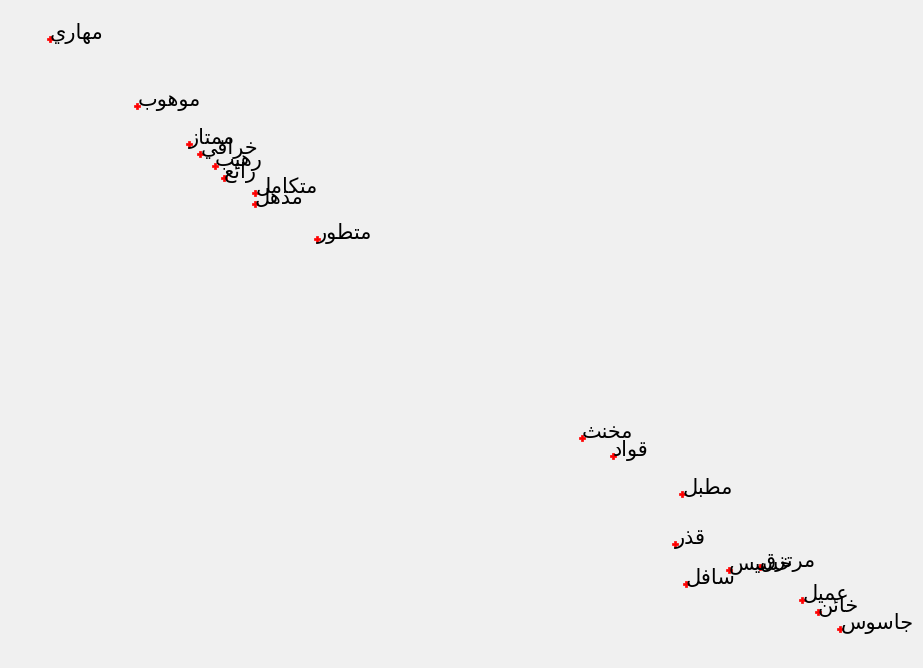

In [84]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(rezk_model, SENTIMENT_WORDS, 250, .07)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "r_SENTIMENT_WORDS.png")

[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 9.311430
[t-SNE] KL divergence after 50 iterations with early exaggeration: 36.588402
[t-SNE] KL divergence after 250 iterations: 0.050656
The shape of our word_features is: (19, 2)


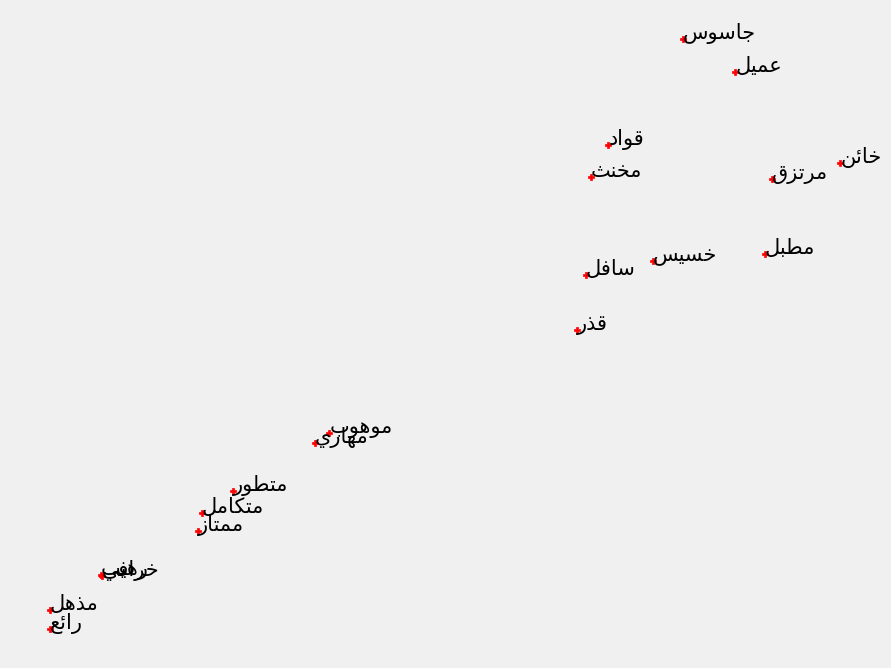

In [85]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(bakr_model, SENTIMENT_WORDS, 250, .07)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "b_SENTIMENT_WORDS.png")

In [86]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(muhammed_model, SENTIMENT_WORDS, 250, .07)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "m_SENTIMENT_WORDS.png")

KeyError: "Key 'ÿÆÿßÿ¶ŸÜ' not present"

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 3.076933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.592648
[t-SNE] KL divergence after 1400 iterations: 0.223208
The shape of our word_features is: (60, 2)


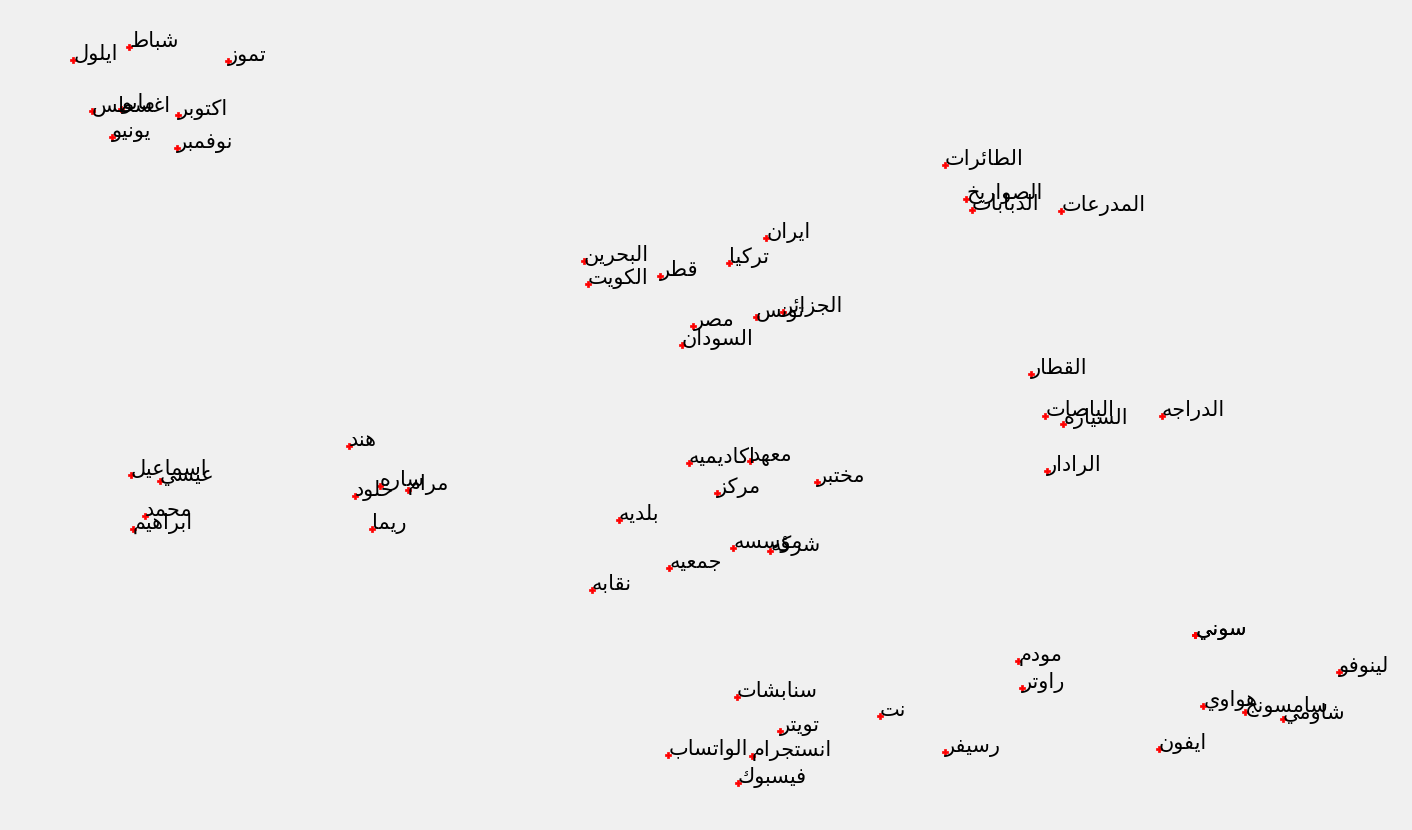

In [109]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(rezk_model, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "r_1_NER_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 3.076933
[t-SNE] KL divergence after 150 iterations with early exaggeration: 48.592655
[t-SNE] KL divergence after 1400 iterations: 0.216820
The shape of our word_features is: (60, 2)


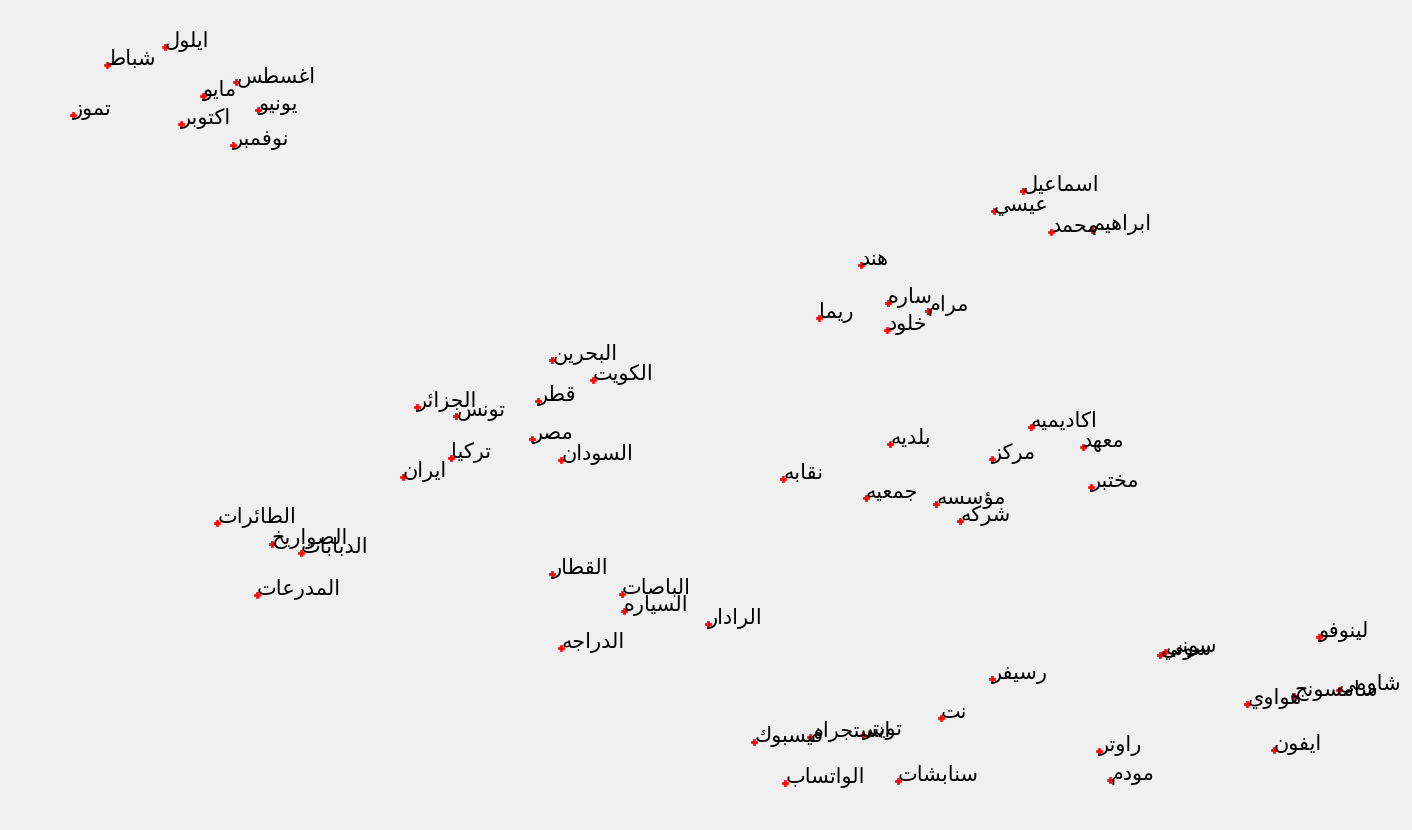

In [110]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(rezk_model, NER_WORDS, 1400, .5)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "r_2_NER_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 8.597755
[t-SNE] KL divergence after 200 iterations with early exaggeration: 49.491753
[t-SNE] KL divergence after 250 iterations: 1.639405
The shape of our word_features is: (60, 2)


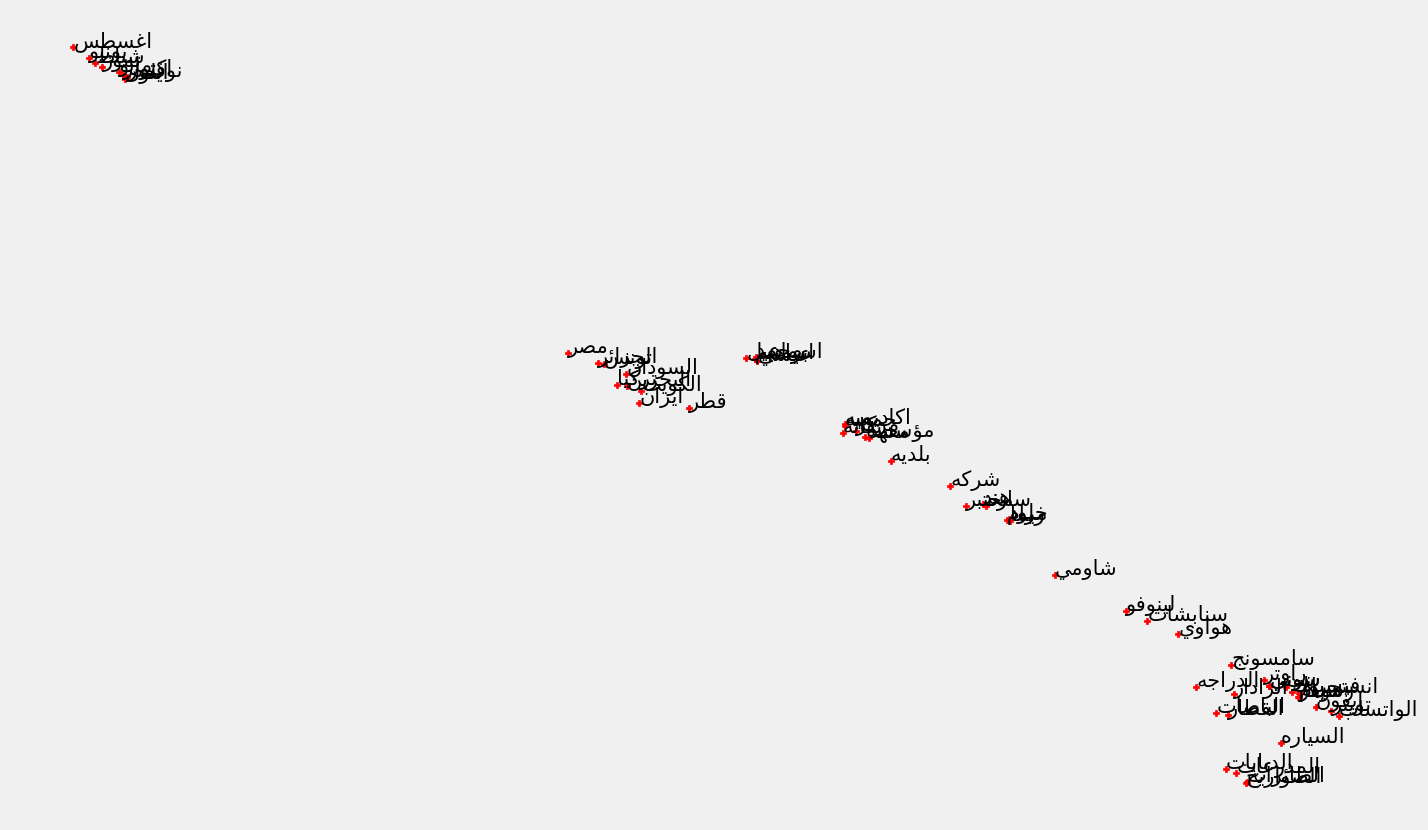

In [111]:
# Reduce the dimension of NER_WORDS (error because min count is 300)
tsne_df_scale = tsne_graph(bakr_model, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "b_1_NER_WORDS.png")

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 60 samples in 0.000s...
[t-SNE] Computed neighbors for 60 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 60 / 60
[t-SNE] Mean sigma: 8.597755
[t-SNE] KL divergence after 50 iterations with early exaggeration: 49.491753
[t-SNE] KL divergence after 1400 iterations: 0.204732
The shape of our word_features is: (60, 2)


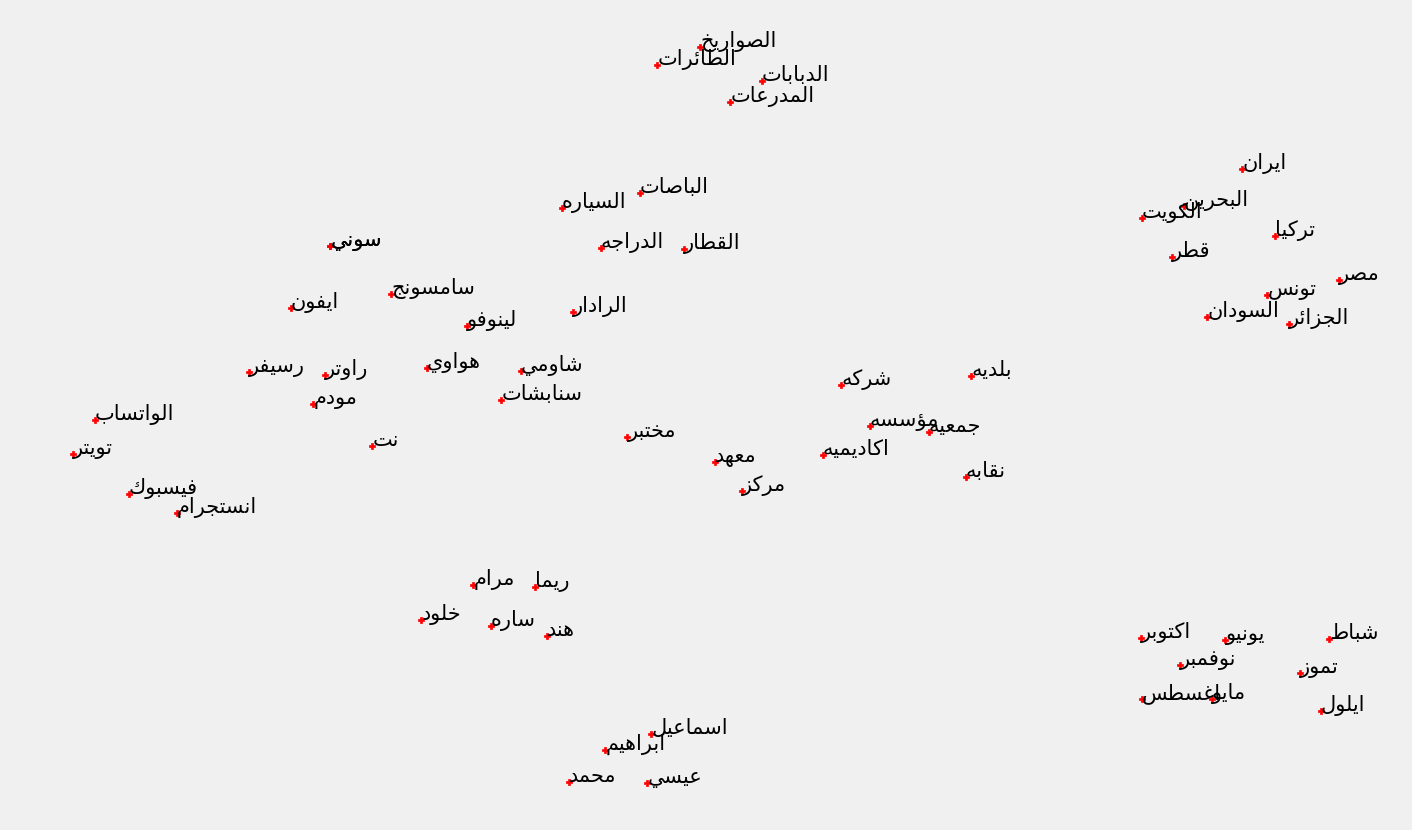

In [112]:
# Reduce the dimension of NER_WORDS (error because min count is 300)
tsne_df_scale = tsne_graph(bakr_model, NER_WORDS, 1400, .5)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "b_2_NER_WORDS.png")

In [101]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(muhammed_model, NER_WORDS, 1400, .5)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "m_NER_WORDS.png")

KeyError: "Key 'ÿ±ÿßŸàÿ™ÿ±' not present"

In [102]:
print(tokens_to_graphs)

{'O_+_token': ['B_+', 'O_-', 'AB_+', 'A_+', 'ŸÅÿµŸäŸÑŸá_ÿØŸÖ', 'ÿ±ŸÇŸÖ_ÿßŸÑŸÖŸÑŸÅ', 'ÿßŸÑŸÅÿµŸäŸÑŸá_:', 'ŸÅÿ¶Ÿá_A', '-_O', 'ŸÖÿ≠ÿ™ÿßÿ¨ŸäŸÜ_ÿØŸÖ'], 'O_+_%': [0.5346683263778687, 0.5326820015907288, 0.3811468780040741, 0.35411107540130615, 0.3521767854690552, 0.3425527513027191, 0.3293618857860565, 0.3264305293560028, 0.3137696087360382, 0.30765408277511597], 'ü§£_token': ['üòÜ', 'üòÅ', 'üòú', 'üòè', 'üòÖ', 'üòí', 'ŸáŸá', 'üòÇ', 'üò¨', 'üòÄ'], 'ü§£_%': [0.8333120942115784, 0.8321138024330139, 0.8205730319023132, 0.819418728351593, 0.8010570406913757, 0.7967824339866638, 0.7967004776000977, 0.7781848907470703, 0.7624844312667847, 0.7618412375450134], 'üá∞üáº_token': ['üá¥üá≤', 'ÿßŸÑÿπŸäÿØ_ÿßŸÑŸàÿ∑ŸÜŸä_ÿßŸÑŸÉŸàŸäÿ™Ÿä', 'ÿßŸÑŸäŸàŸÖ_ÿßŸÑŸàÿ∑ŸÜŸä_ÿßŸÑŸÉŸàŸäÿ™Ÿä', 'üá¶üá™', 'ÿßŸÑŸÉŸàŸäÿ™', 'üá∏üá¶', 'üá∂üá¶', 'ÿπŸÖÿßŸÜ', 'üáØüá¥', 'ÿßŸÑÿ≠ÿ®Ÿäÿ®Ÿá'], 'üá∞üáº_%': [0.6610525846481323, 0.6014205813407898, 0.5943148732185364, 0.5859056711196899, 0.5772003531455994, 0.561791